In [5]:
# Dados
# https://finance.yahoo.com/quote/BTC-USD/history?period1=1410825600&period2=1653436800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [7]:
df = pd.read_csv('BTC-USD (2).csv', parse_dates=['Date'], index_col='Date')

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [8]:
# Modelo padrão "pearson"
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999531,0.999128,0.998832,0.998832,0.723295
High,0.999531,1.000000,0.999057,0.999488,0.999488,0.727196
Low,0.999128,0.999057,1.000000,0.999396,0.999396,0.715320
Close,0.998832,0.999488,0.999396,1.000000,1.000000,0.722208
Adj Close,0.998832,0.999488,0.999396,1.000000,1.000000,0.722208
Volume,0.723295,0.727196,0.715320,0.722208,0.722208,1.000000


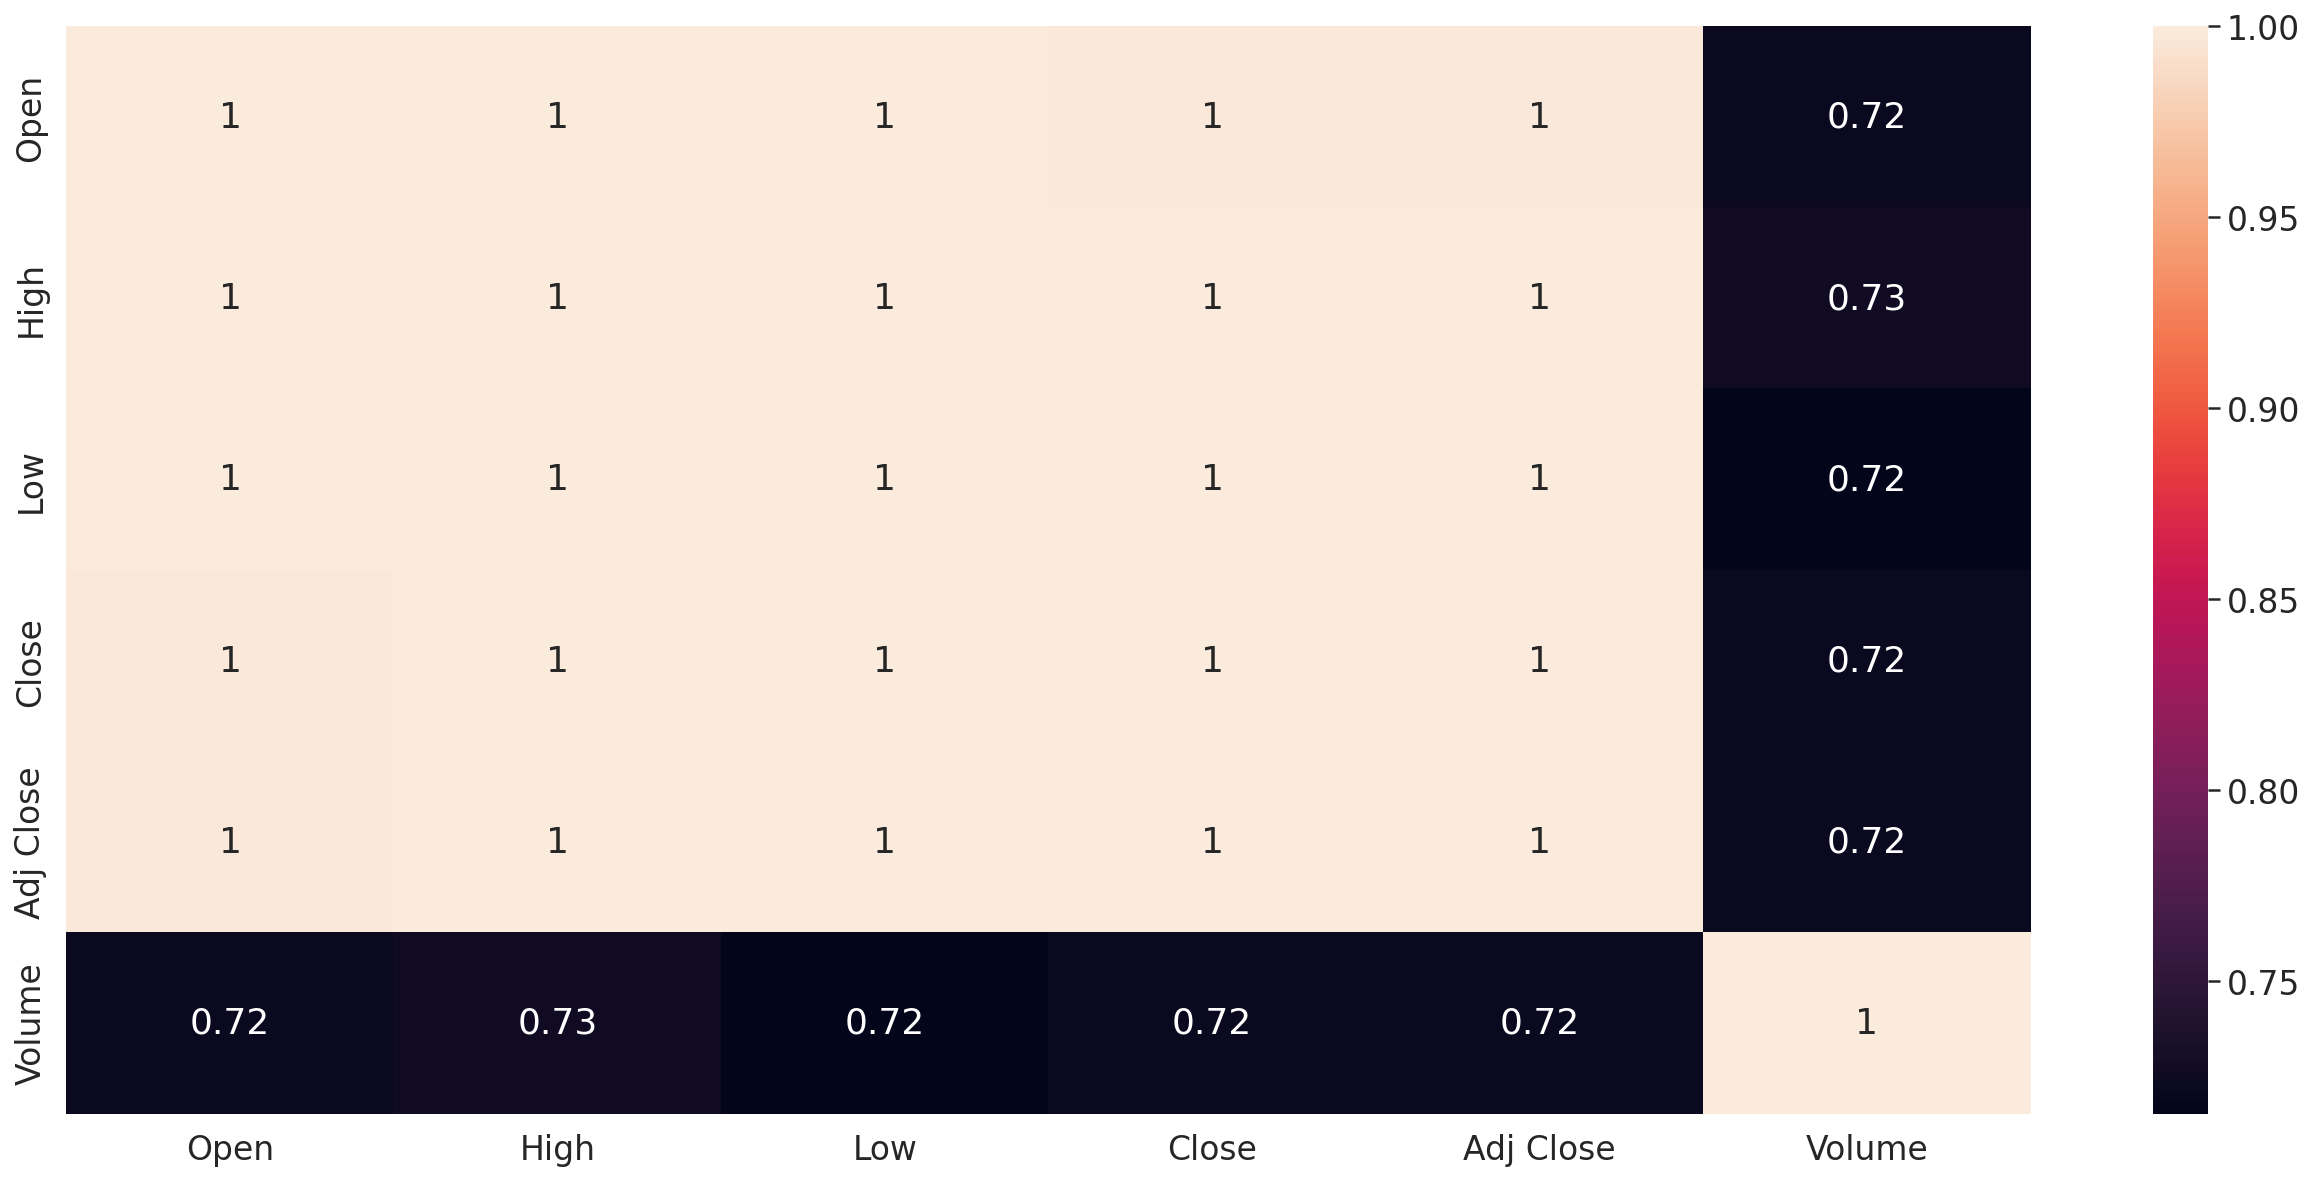

In [9]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [10]:
df = pd.read_csv('BTC-USD (2).csv', usecols=['Close'])

df.head()

,Close
0,457.334015
1,424.440002
2,394.795990
3,408.903992
4,398.821014


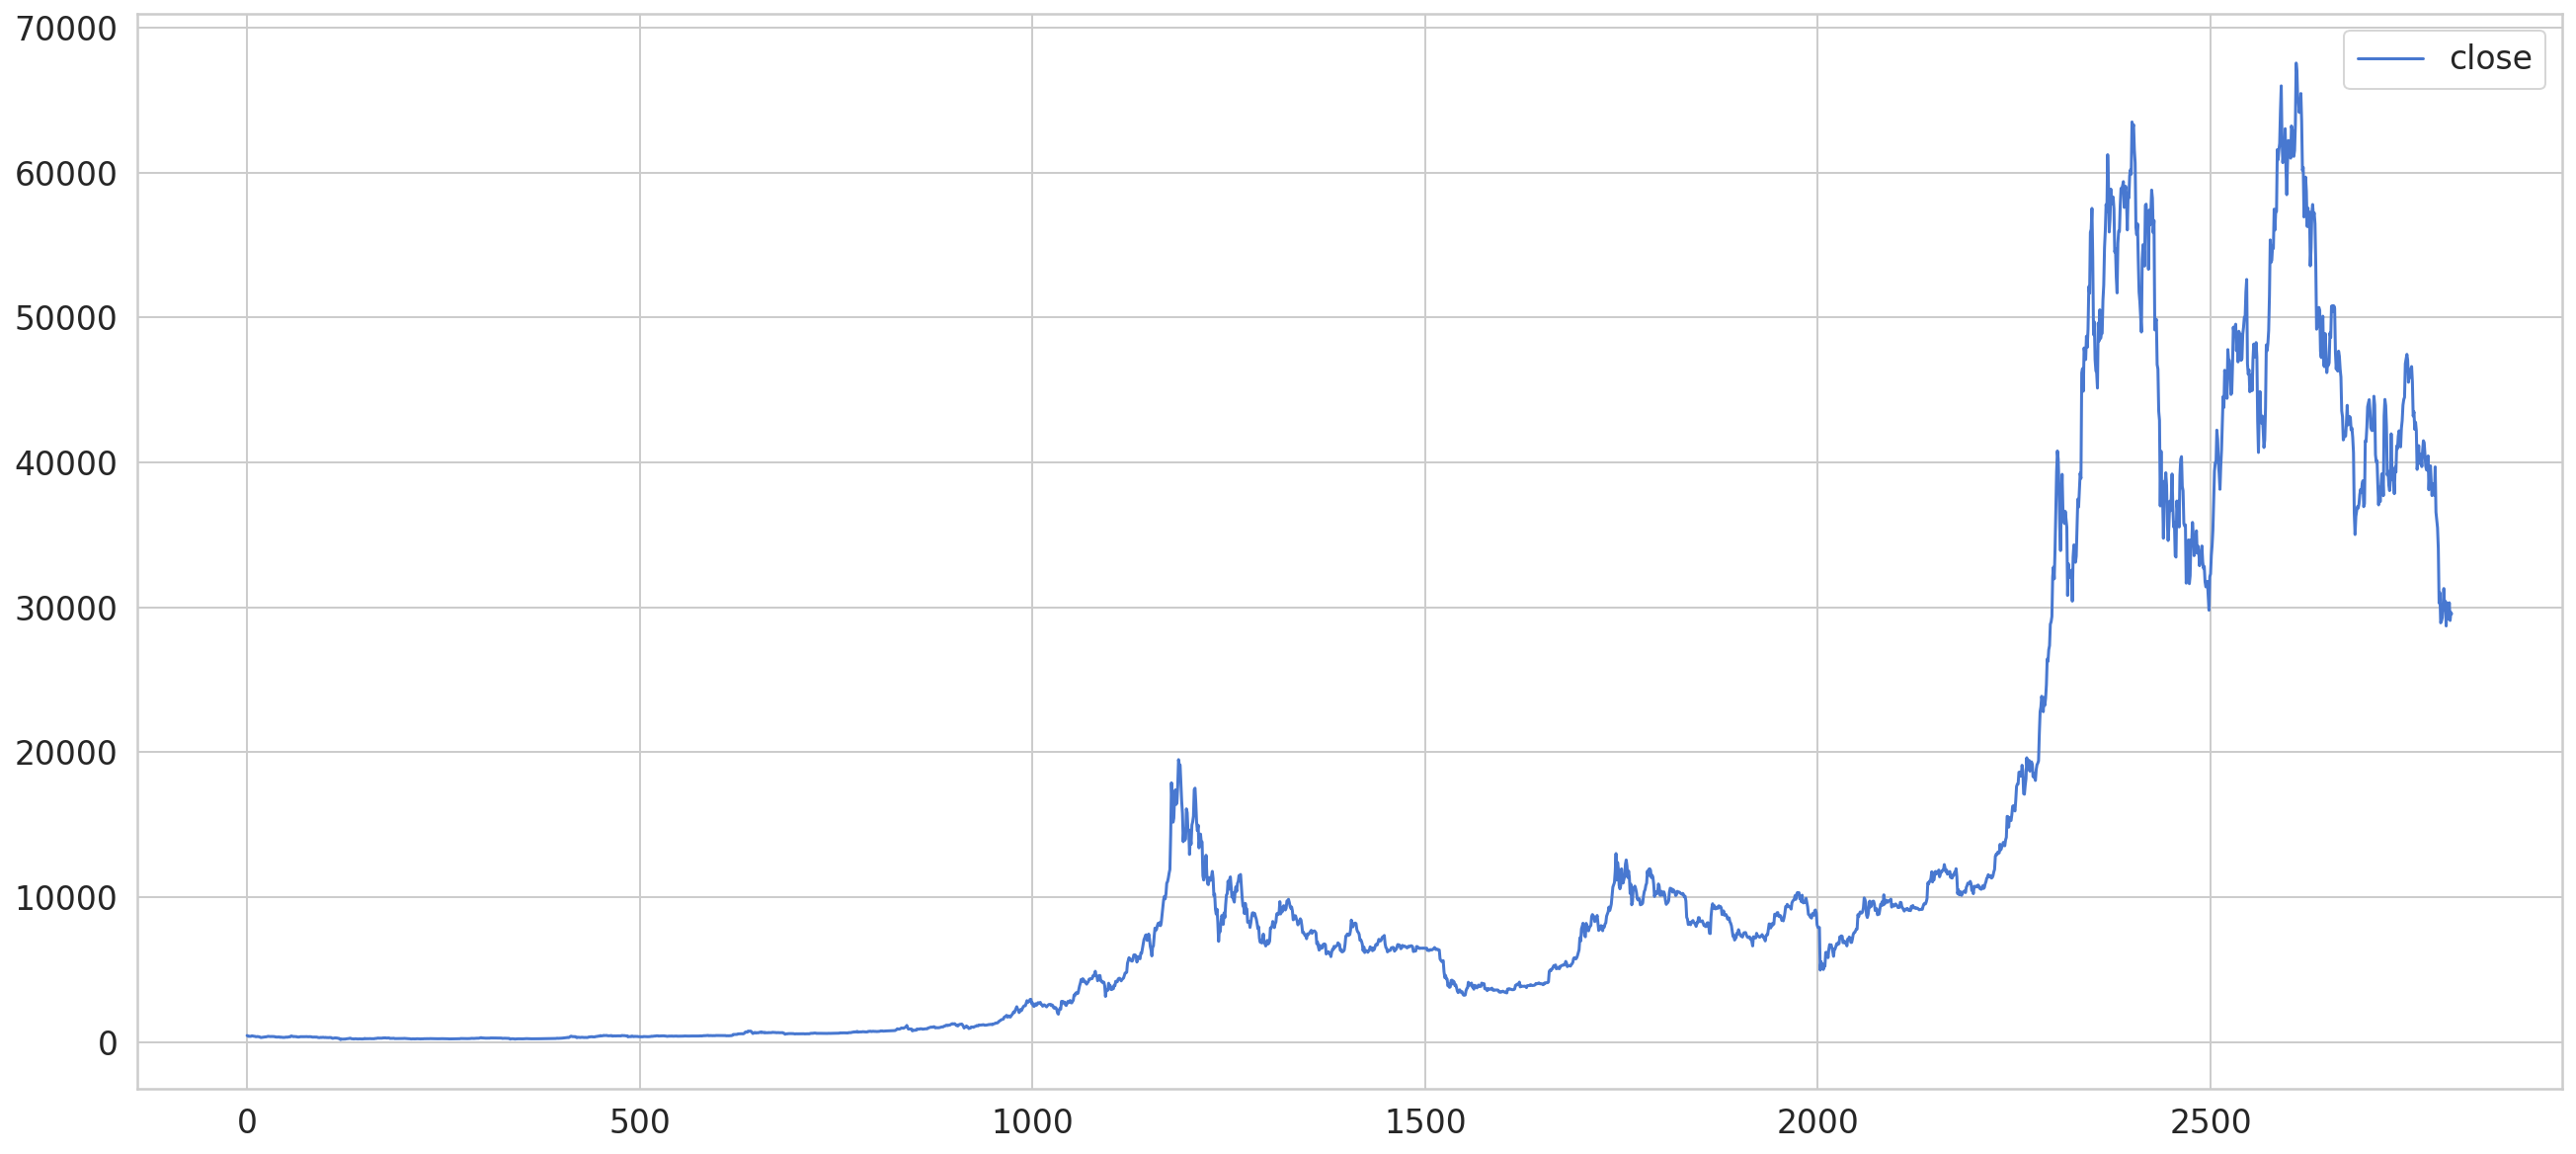

In [11]:
plt.plot(df, label='close')
plt.legend()

In [12]:
train_size = int(len(df) * 0.7)

val_size = int(len(df) * 0.15) + train_size

test_size = int(len(df) * 0.15) + val_size

treino, validacao, teste = df.iloc[0 : train_size], df.iloc[train_size : val_size], df.iloc[val_size : len(df)]

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler = scaler.fit(df[['Close']])

treino['Close'] = scaler.transform(treino[['Close']])

validacao['Close'] = scaler.transform(validacao[['Close']])

teste['Close'] = scaler.transform(teste[['Close']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

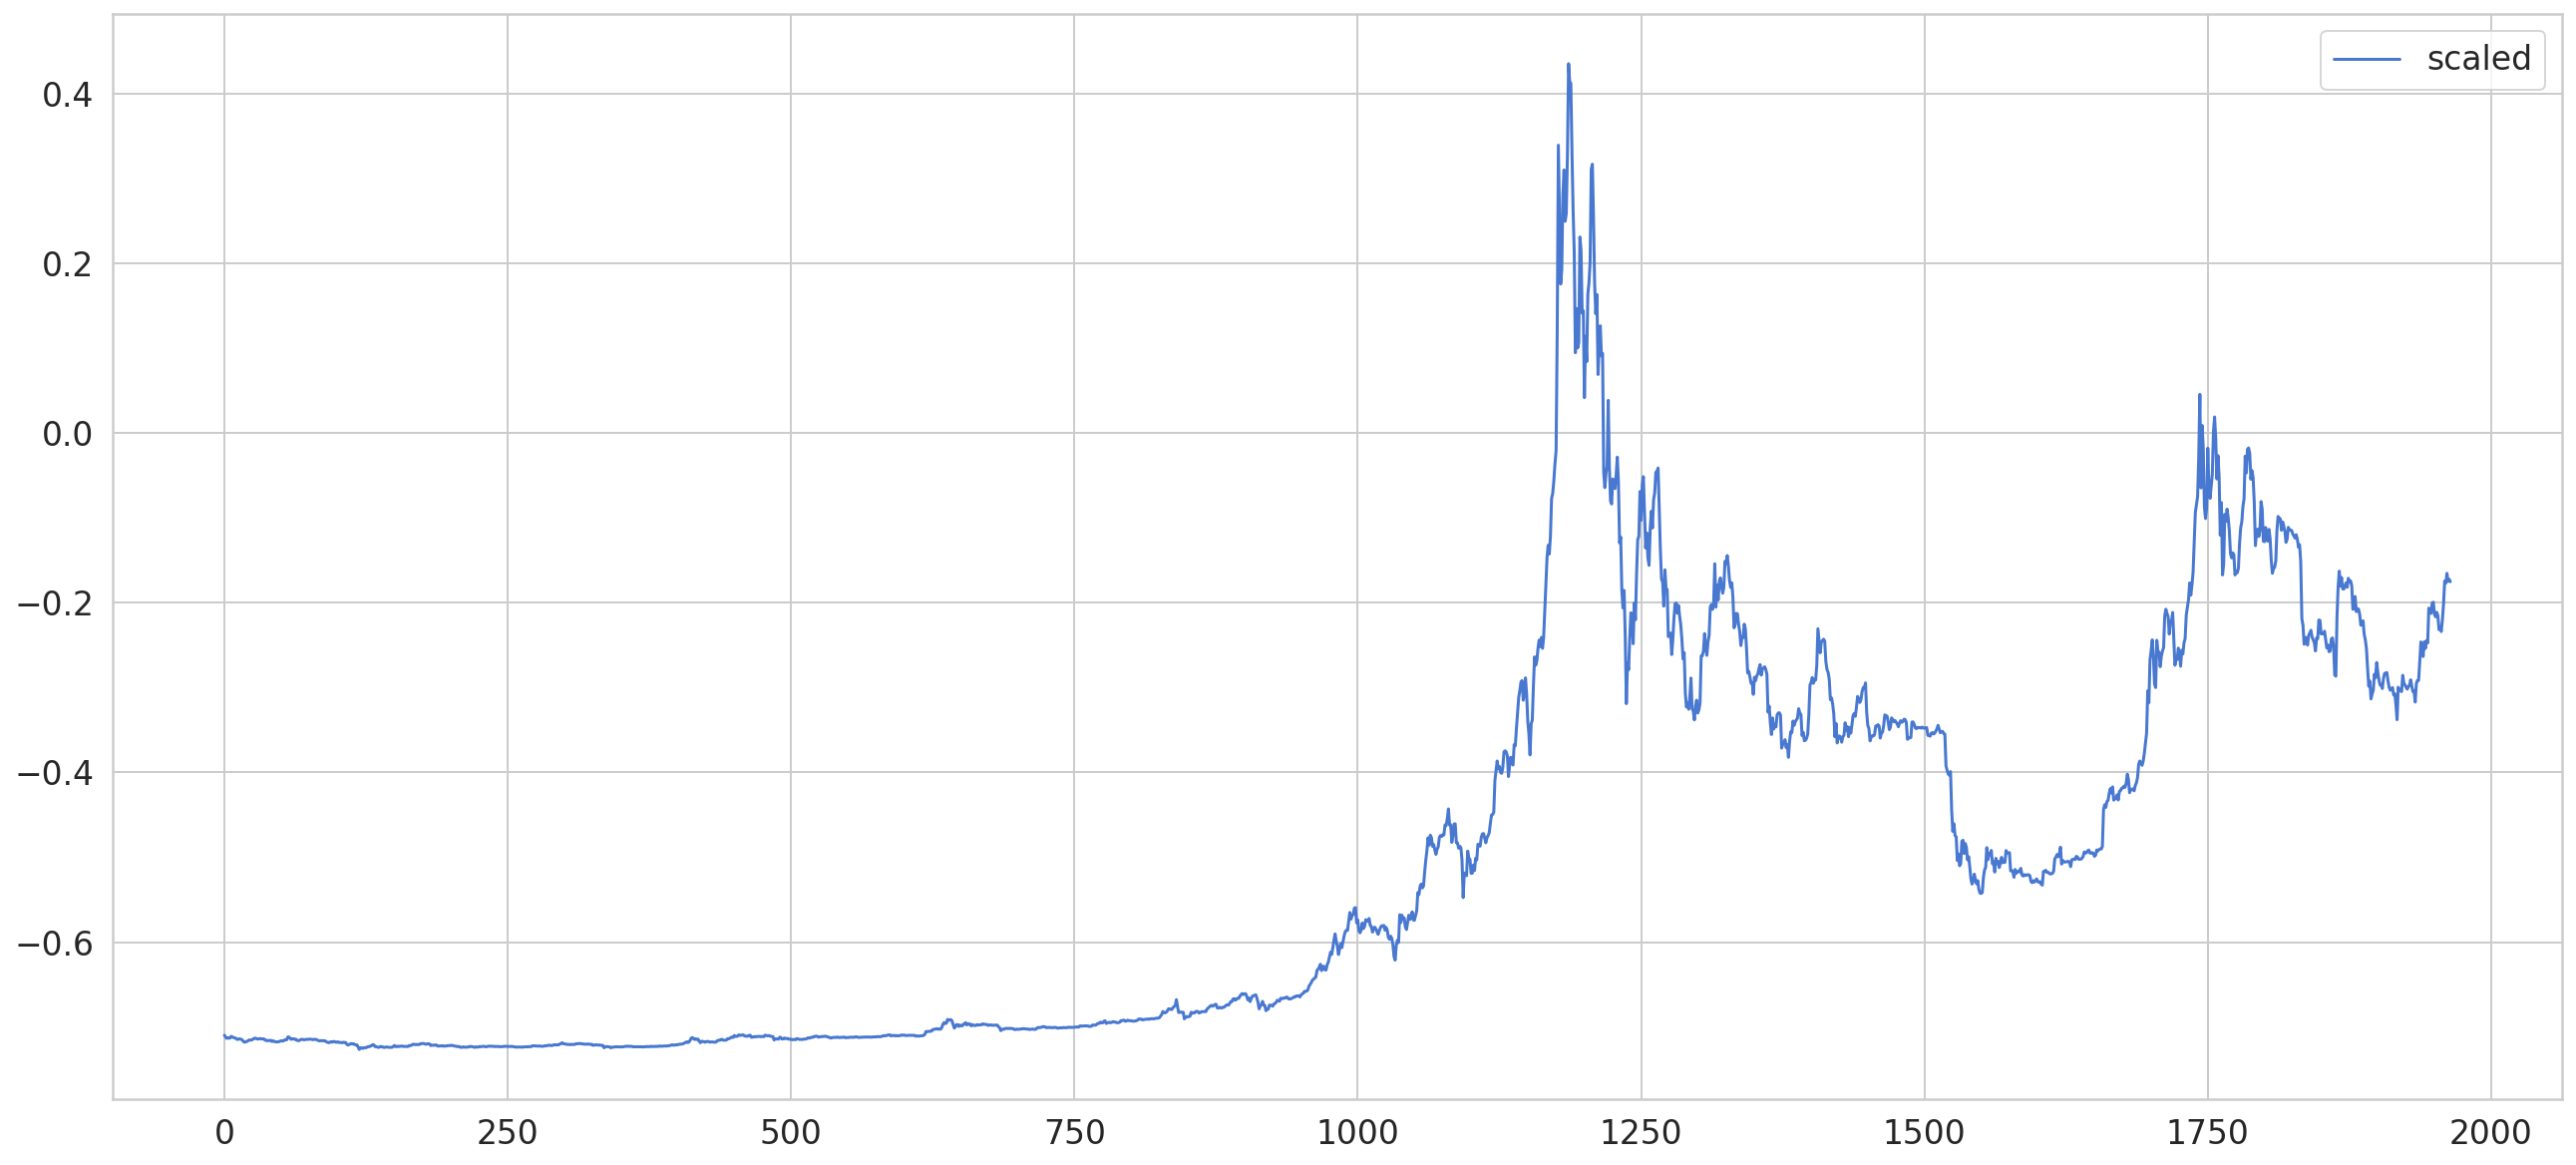

In [14]:
plt.plot(treino['Close'], label = 'scaled')
plt.legend()
plt.show()

In [47]:
def create_dataset(X, y, time_steps):
    Xs, ys = [], []

    for i in range(len(X) - time_steps):      
        Xs.append(X.iloc[i:(i + time_steps)].values)        

        ys.append(y.iloc[i + time_steps])

    return np.array(Xs), np.array(ys)


TIME_STEPS = 30

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(treino[['Close']], treino.Close, TIME_STEPS)

X_test, y_test = create_dataset(teste[['Close']], teste.Close, TIME_STEPS)

In [414]:
"""model = keras.Sequential()

model.add(keras.layers.LSTM(units= 64, input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(keras.layers.Dropout(rate= 0.2))

model.add(keras.layers.RepeatVector(n= X_train.shape[1]))

model.add(keras.layers.LSTM(units= 64, return_sequences= True))

model.add(keras.layers.Dropout(rate= 0.2))

model.add(keras.layers.TimeDistributed(keras.layers.Dense(units= X_train.shape[2])))

model.compile(loss='mae', optimizer='adam')"""

In [486]:
model = keras.Sequential()

model.add(keras.layers.LSTM(units = 128, input_shape = (X_train.shape[1], X_train.shape[2])))

model.add(keras.layers.Dropout(rate = 0.2))

model.add(keras.layers.RepeatVector(n = X_train.shape[1]))

model.add(keras.layers.LSTM(units = 128, return_sequences = True))

model.add(keras.layers.Dropout(rate = 0.2))

model.add(keras.layers.TimeDistributed(keras.layers.Dense(units = X_train.shape[2])))

model.compile(loss='mae', optimizer='adam')

In [540]:
history = model.fit(X_train, y_train, epochs=3, batch_size= 32, validation_split= 0.1, shuffle=False)

Epoch 1/3
55/55 [==============================] - 4s 76ms/step - loss: 0.0755 - val_loss: 0.0528
Epoch 2/3
55/55 [==============================] - 4s 80ms/step - loss: 0.0810 - val_loss: 0.0520
Epoch 3/3
55/55 [==============================] - 4s 67ms/step - loss: 0.0880 - val_loss: 0.0403


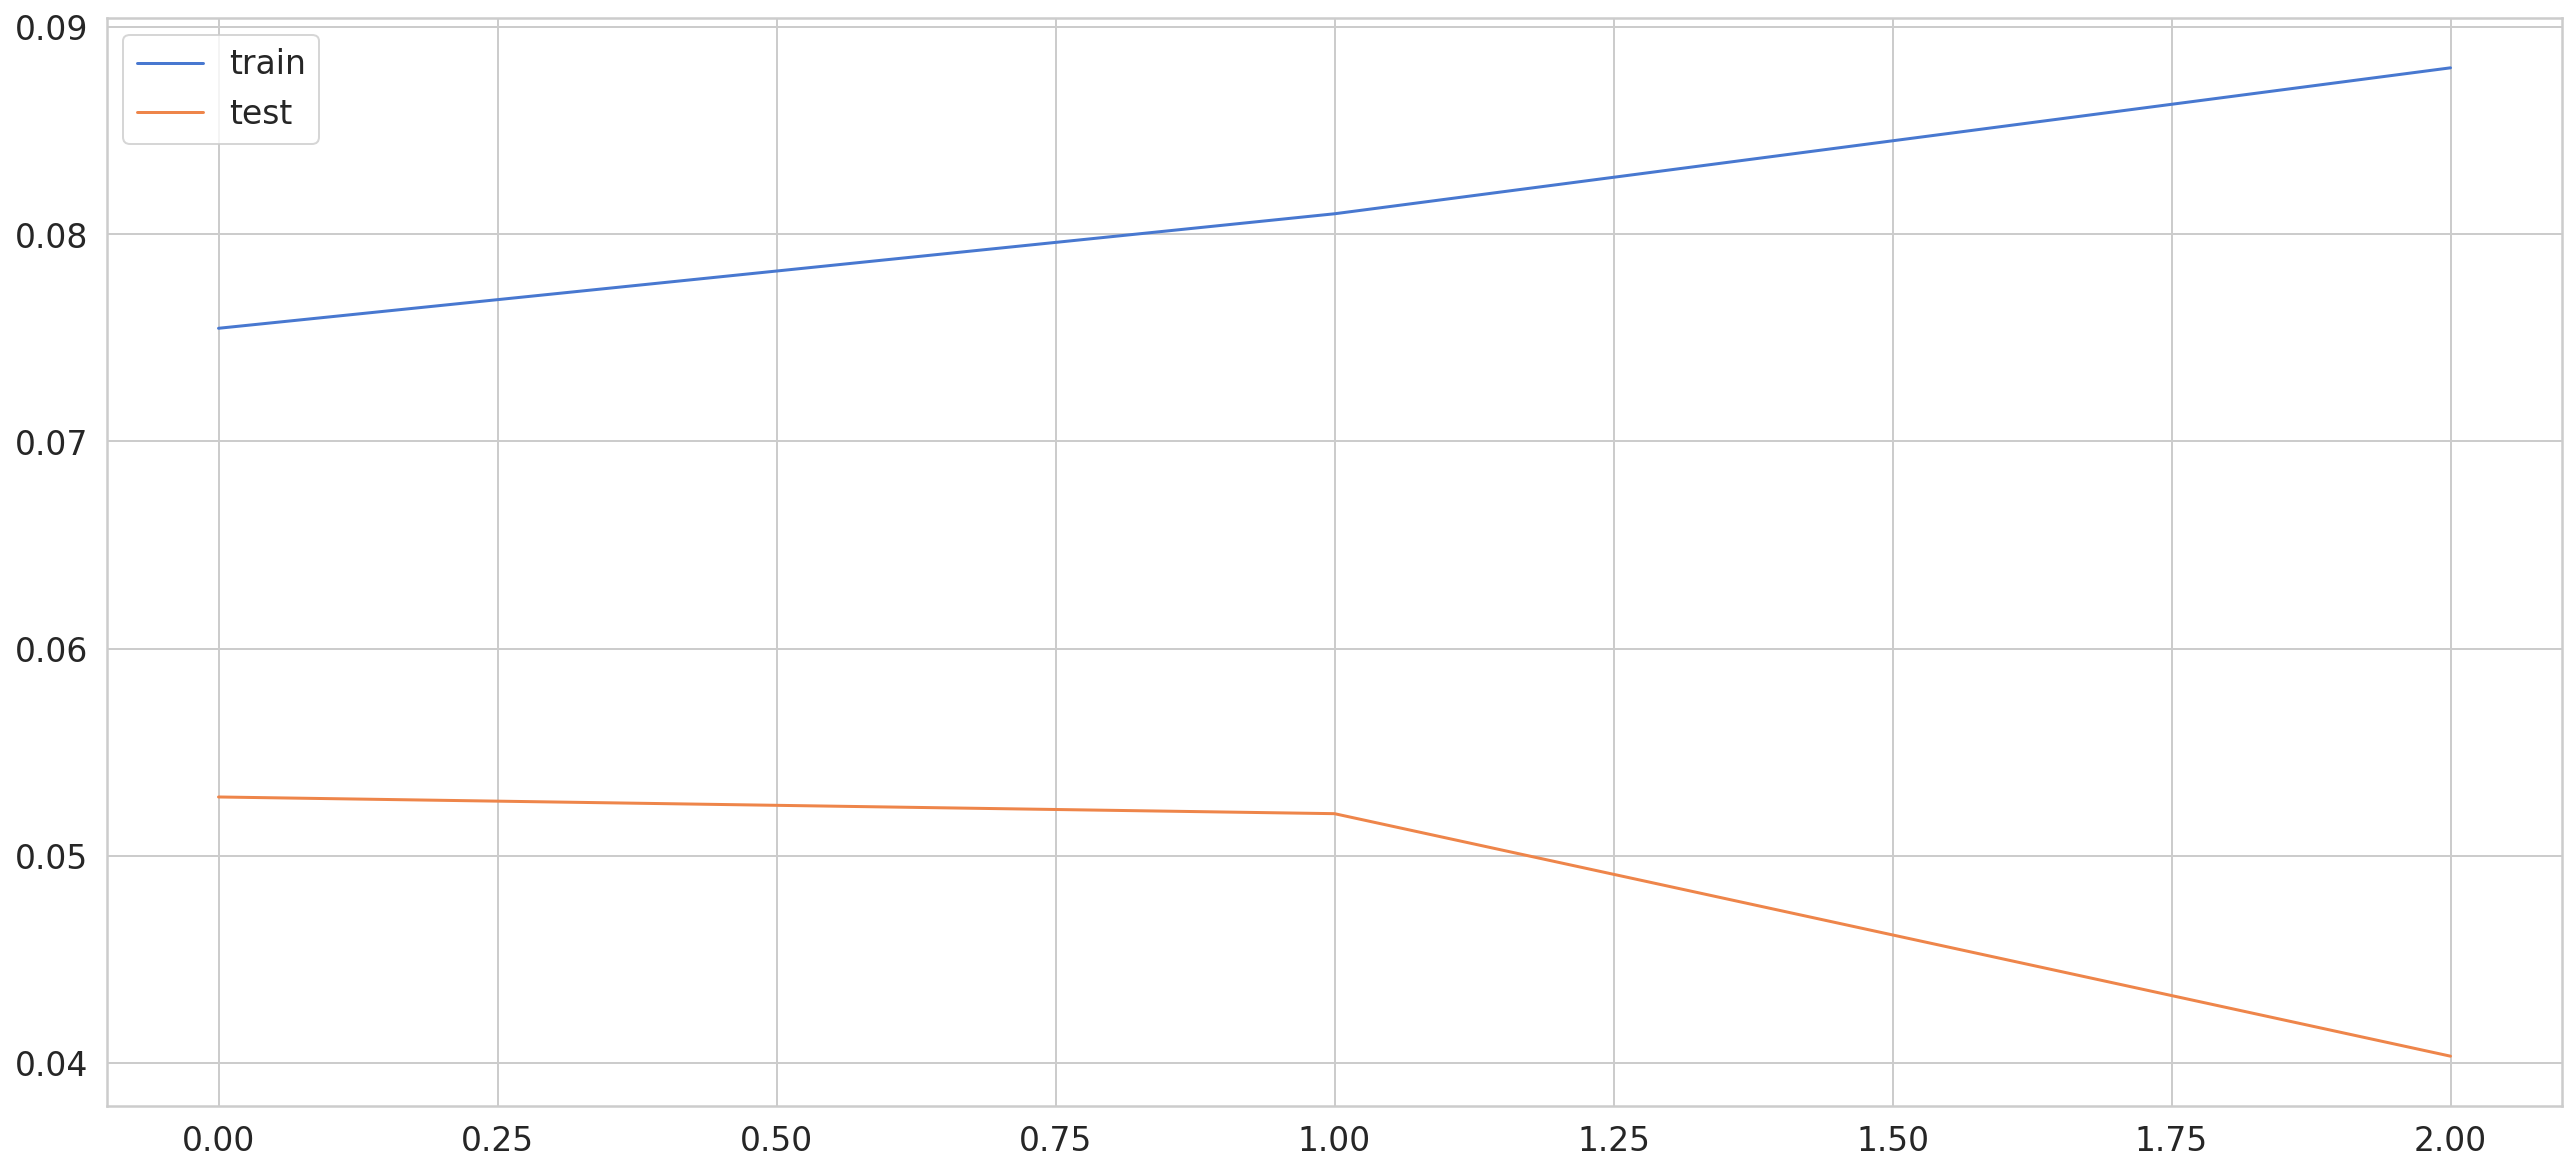

In [541]:
plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test')

plt.legend();

In [542]:
X_train_pred = model.predict(X_train)

train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

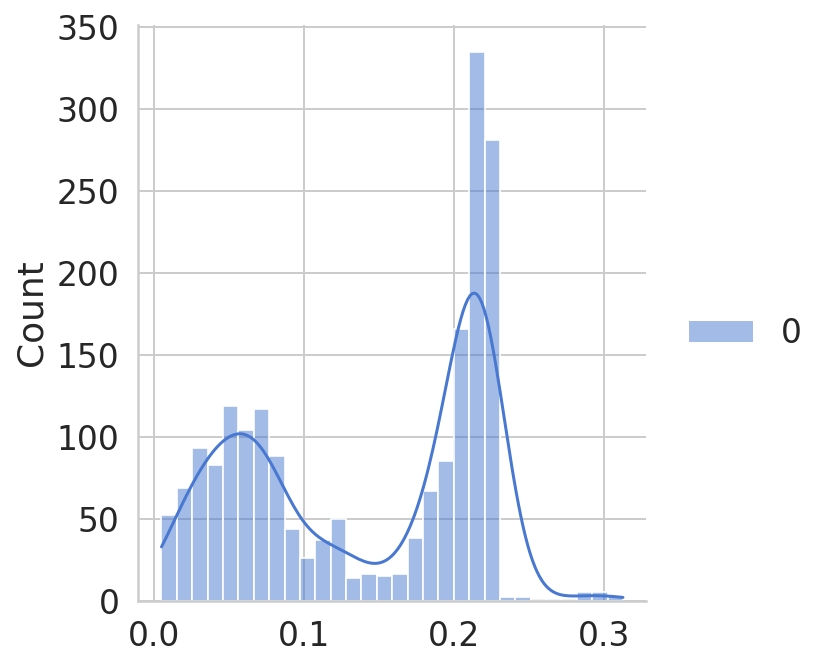

In [543]:
sns.displot(train_mae_loss, bins=30, kde=True);

In [544]:
X_test_pred = model.predict(X_test)

test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

In [545]:
THRESHOLD = 0.7

test_score_df = pd.DataFrame(index=teste[TIME_STEPS:].index)

test_score_df['loss'] = test_mae_loss

test_score_df['threshold'] = THRESHOLD

test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold

test_score_df['Close'] = teste[TIME_STEPS:].Close

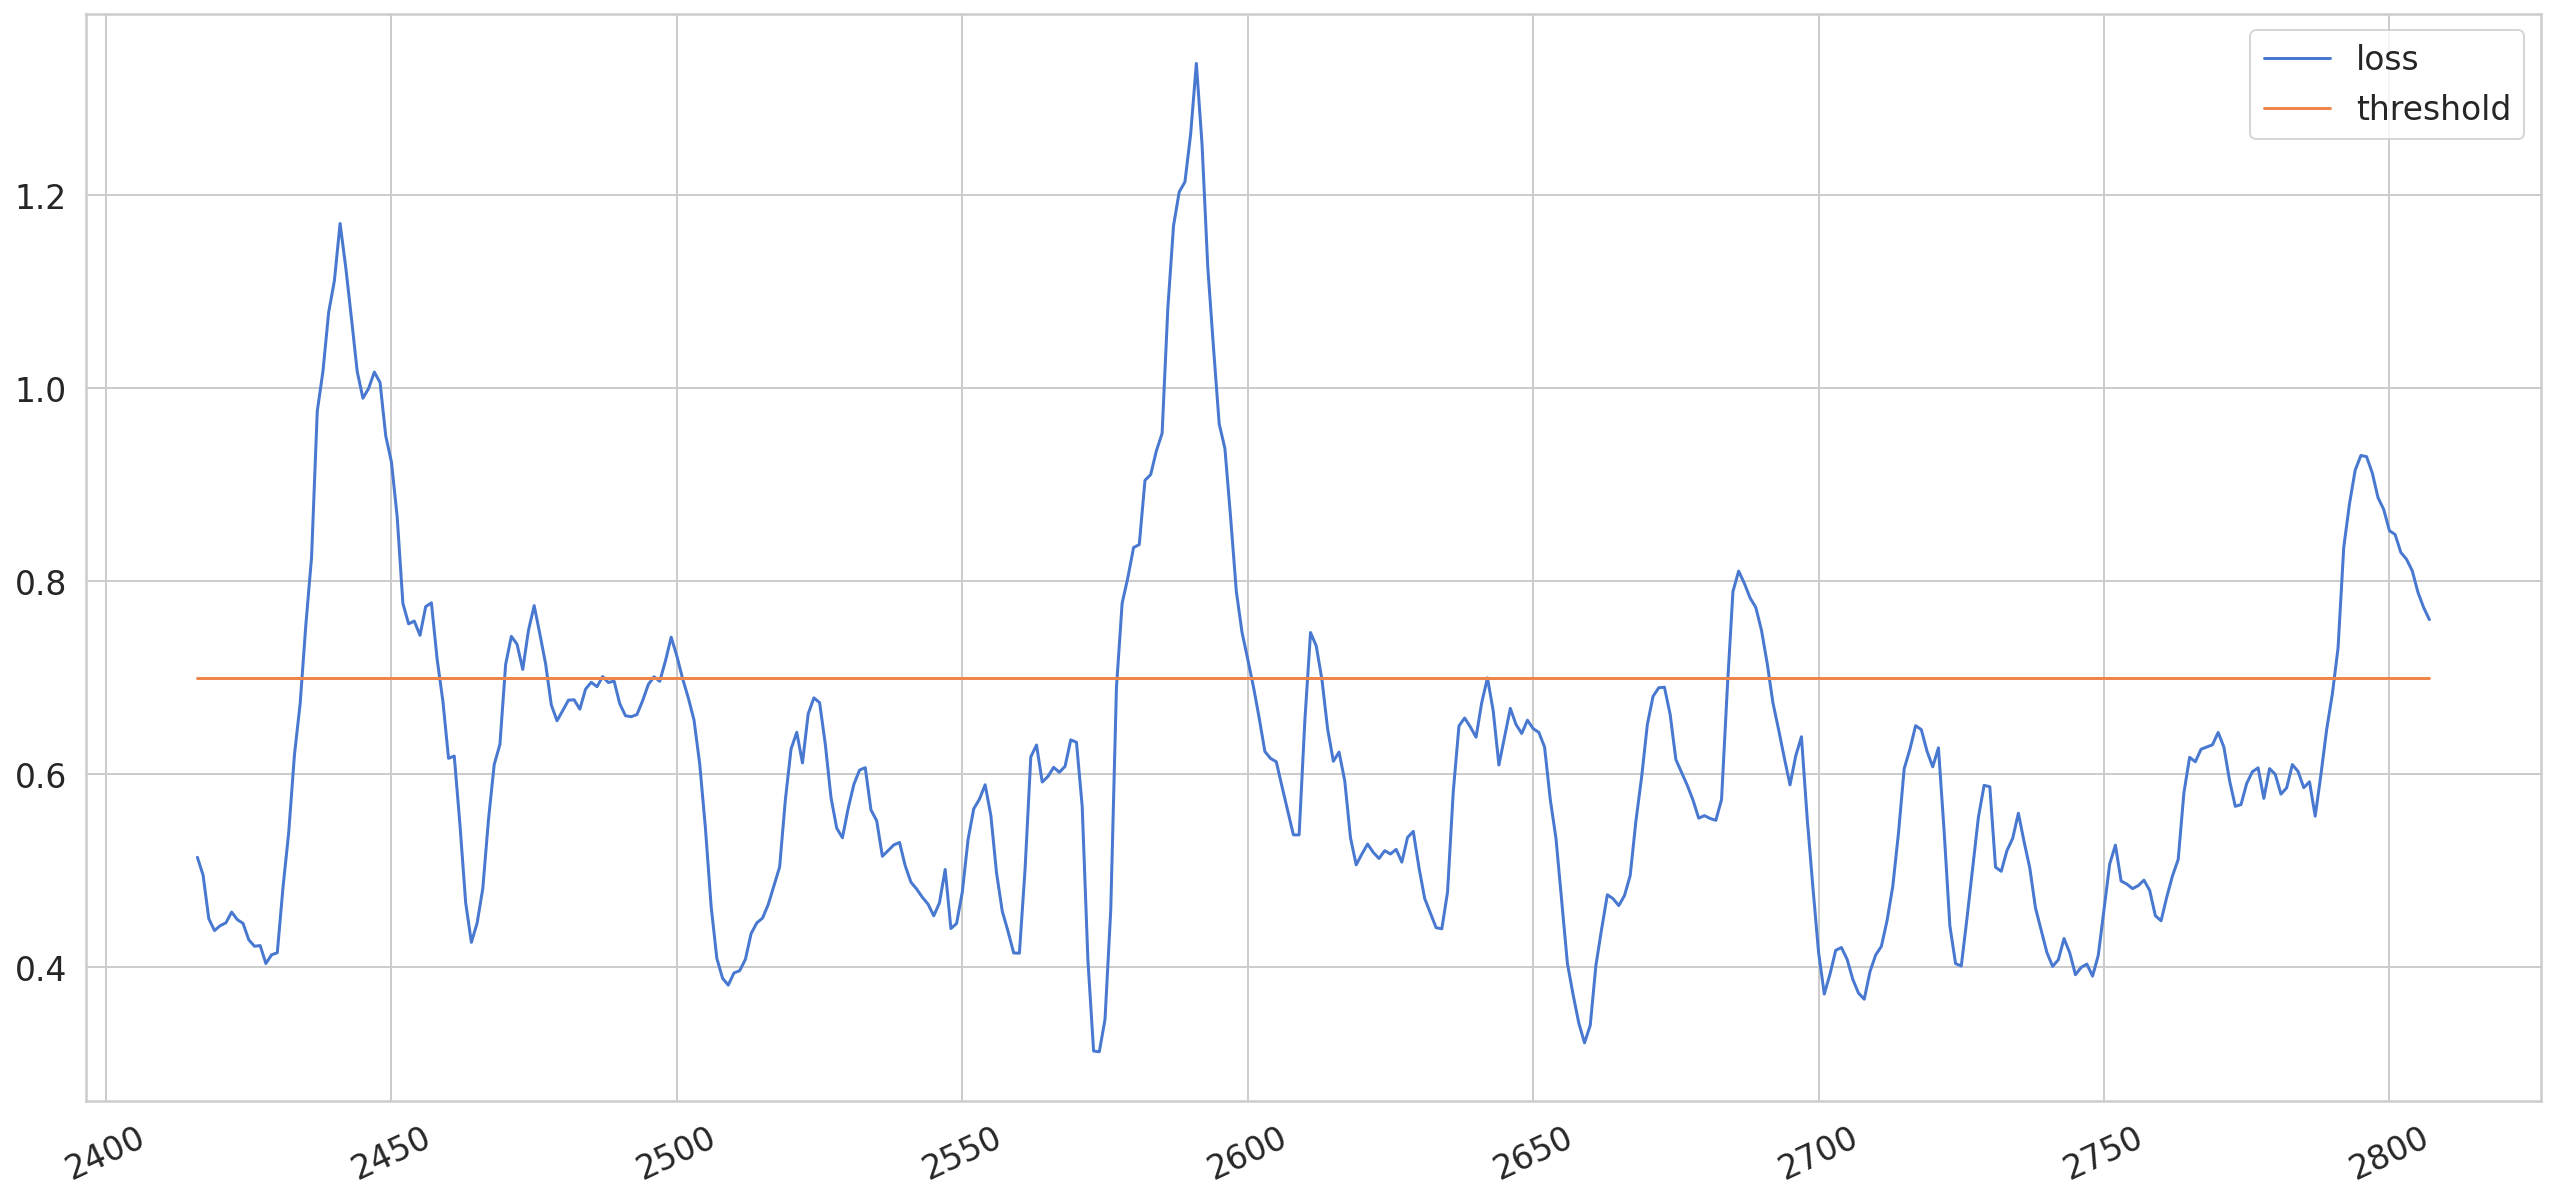

In [546]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')

plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')

plt.xticks(rotation=25)

plt.legend();

In [547]:
anomalies = test_score_df[test_score_df.anomaly == True]

anomalies

,loss,threshold,anomaly,Close
2435,0.754731,0.7,True,1.843731
2436,0.824555,0.7,True,1.488429
2437,0.976147,0.7,True,1.715813
2438,1.017721,0.7,True,1.506609
2439,1.078801,0.7,True,1.520561
...,...,...,...,...
2803,0.822752,0.7,True,1.033084
2804,0.810834,0.7,True,1.086707
2805,0.788504,0.7,True,1.013035
2806,0.772663,0.7,True,1.046519


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


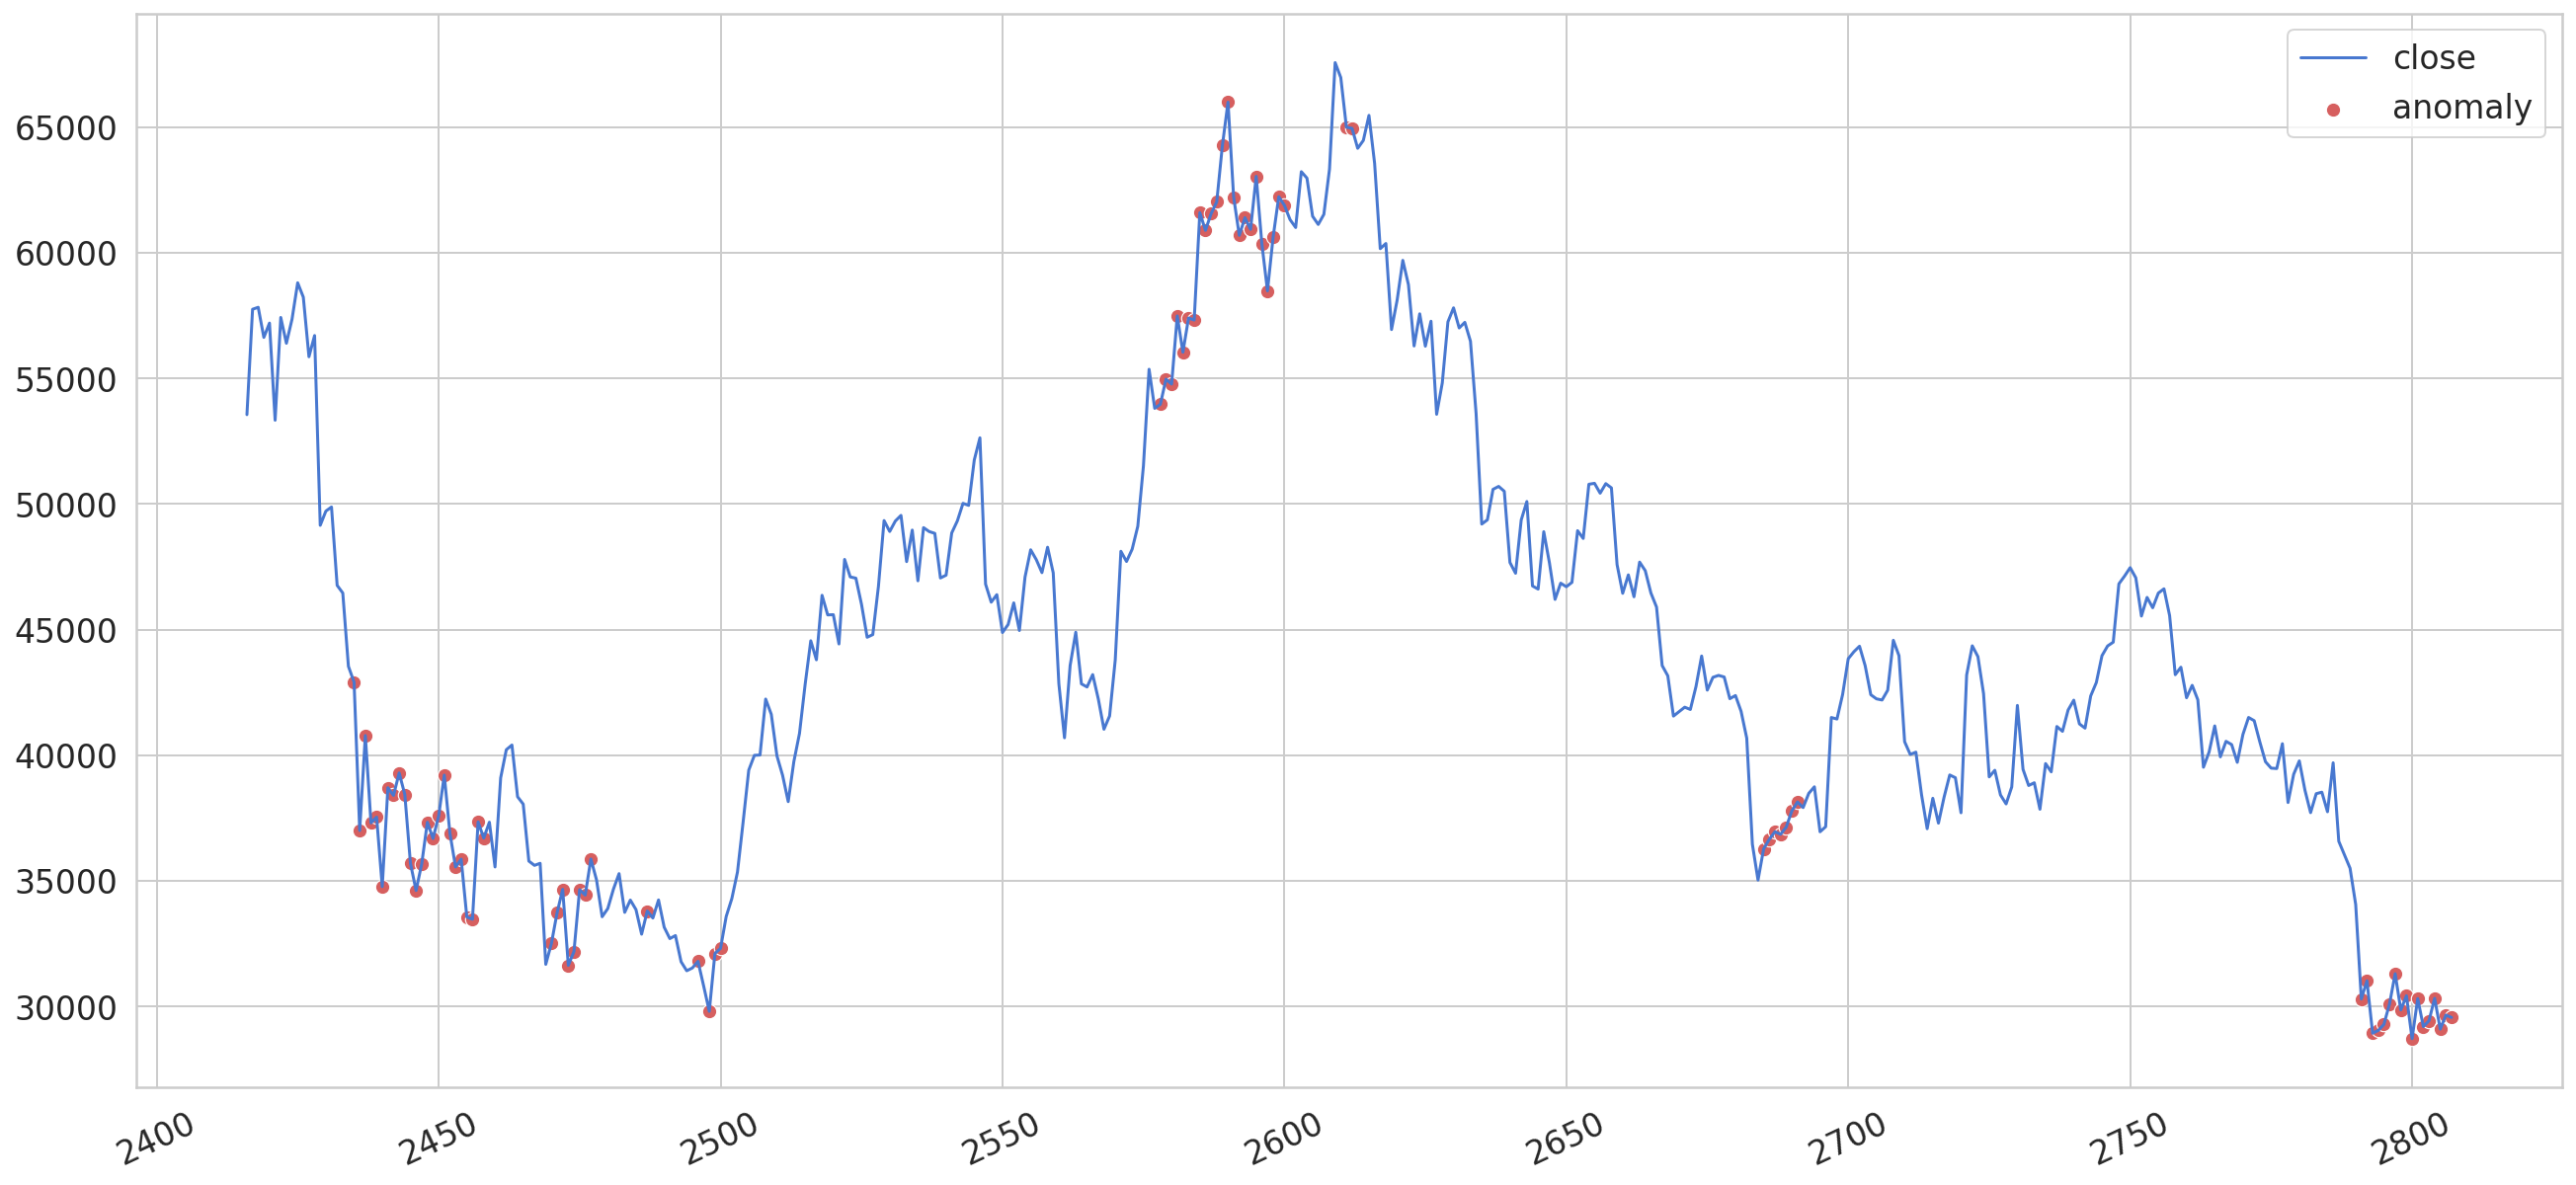

In [548]:
plt.plot(
  teste[TIME_STEPS:].index, 
  scaler.inverse_transform(teste[TIME_STEPS:].Close.values.reshape(1,-1)).reshape(-1), 
  label='close'
);

sns.scatterplot(
  anomalies.index,
  scaler.inverse_transform(anomalies.Close.values.reshape(1,-1)).reshape(-1),
  color=sns.color_palette()[3],
  s=52,
  label='anomaly'
)

plt.xticks(rotation=25)

plt.legend();